In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
df = pd.read_csv('3_economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [7]:
df = df.iloc[:, 3:]

In [11]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [13]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


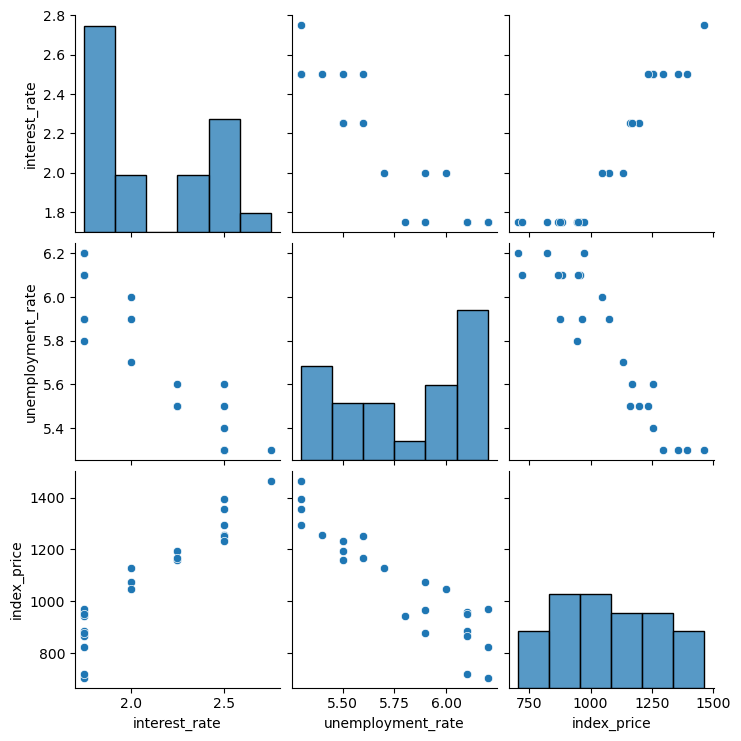

In [14]:
sns.pairplot(df)

In [16]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [18]:
from sklearn.model_selection import train_test_split
x_t, x_tt, y_t, y_tt = train_test_split(x, y, test_size=0.2)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_t = std.fit_transform(x_t)
x_tt = std.transform(x_tt)


In [24]:
lr = LinearRegression(n_jobs=-1)
lr.fit(x_t, y_t)
lr.intercept_, lr.coef_

(1064.1578947368423, array([110.37609744, -77.99236154]))

In [25]:
y_p = lr.predict(x_tt)
y_p

array([ 846.10588935, 1257.31112433,  870.48720999, 1418.76085663,
        919.24985128])

In [27]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(mean_squared_error(y_tt, y_p))
print(mean_absolute_error(y_tt, y_p))
print(r2_score(y_tt, y_p))

2478.040412193384
41.18381915526474
0.954382580464403
